# Exploratory Data Analysis (EDA)
-------------------------
- This notebook is dedicated to the exploratory data analysis of the dataset
raw/NF-UNSW-NB15-v2 which contains the network traffic data in the netflow format.
- The dataset contains *43* etflow features and a total of *2390275* records.



In [1]:
import pandas as pd
import numpy as np
#Libraries for graph visualization
import networkx as nx

In [2]:
%load_ext autoreload
# To automatically reload modules defined in external files
%autoreload 2

In [3]:
from network_ad.config import DATA_PATH
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Loading

In [4]:
from network_ad.config import RAW_DATA_FILE
def load_data():
    return pd.read_csv(DATA_PATH / RAW_DATA_FILE)
data_df = load_data()

In [5]:
# data_df =data_df.sample(frac=0.1)

In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2390275 entries, 0 to 2390274
Data columns (total 45 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   IPV4_SRC_ADDR                object 
 1   L4_SRC_PORT                  int64  
 2   IPV4_DST_ADDR                object 
 3   L4_DST_PORT                  int64  
 4   PROTOCOL                     int64  
 5   L7_PROTO                     float64
 6   IN_BYTES                     int64  
 7   IN_PKTS                      int64  
 8   OUT_BYTES                    int64  
 9   OUT_PKTS                     int64  
 10  TCP_FLAGS                    int64  
 11  CLIENT_TCP_FLAGS             int64  
 12  SERVER_TCP_FLAGS             int64  
 13  FLOW_DURATION_MILLISECONDS   int64  
 14  DURATION_IN                  int64  
 15  DURATION_OUT                 int64  
 16  MIN_TTL                      int64  
 17  MAX_TTL                      int64  
 18  LONGEST_FLOW_PKT             int64  
 19  

In [7]:
data_df.head(n=50)

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,...,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,FTP_COMMAND_RET_CODE,Label,Attack
0,59.166.0.5,1305,149.171.126.8,21,6,1.0,9,1,193,3,...,0,7240,0,0,0,0,0,331.0,0,Benign
1,59.166.0.5,1305,149.171.126.8,21,6,1.0,261,5,469,7,...,8688,8688,18944,74,0,0,0,230.0,0,Benign
2,59.166.0.5,1305,149.171.126.8,21,6,1.0,481,9,750,11,...,10136,10136,33792,132,0,0,0,229.0,0,Benign
3,59.166.0.5,1305,149.171.126.8,21,6,1.0,701,13,1054,15,...,11584,11584,48640,190,0,0,0,125.0,0,Benign
4,59.166.0.5,1305,149.171.126.8,21,6,1.0,1031,19,1474,21,...,14480,13032,64256,251,0,0,0,230.0,0,Benign
5,59.166.0.5,1305,149.171.126.8,21,6,1.0,1251,23,1751,25,...,15928,14480,13568,53,0,0,0,229.0,0,Benign
6,59.166.0.5,1305,149.171.126.8,21,6,1.0,1493,27,2054,29,...,17376,15928,31232,122,0,0,0,125.0,0,Benign
7,175.45.176.1,42208,149.171.126.14,21,6,1.0,309,7,556,7,...,16383,16383,38400,150,0,0,0,227.0,0,Benign
8,59.166.0.5,1305,149.171.126.8,21,6,1.0,1817,33,2510,35,...,20272,17376,46080,180,0,0,0,229.0,0,Benign
9,59.166.0.5,1305,149.171.126.8,21,6,1.0,2059,37,2814,39,...,21720,18824,63744,249,0,0,0,125.0,0,Benign


# 2.  Statistcal Analysis of the dataset

## 2.1.  Distribution of sources and destination adresses
-------------------------
Note that 75% of source IP appear less than 6 times and 75% of destination IP appear less than 9 times.

In [8]:
print("Number of distinct source IP and destination IP: ", data_df['IPV4_SRC_ADDR'].nunique(), data_df['IPV4_DST_ADDR'].nunique())

Number of distinct source IP and destination IP:  40 40


### Sources addresses

count        40.000000
mean      59756.875000
std       97497.790204
min           1.000000
25%         292.750000
50%         591.000000
75%       78463.000000
max      230357.000000
Name: IPV4_SRC_ADDR, dtype: float64

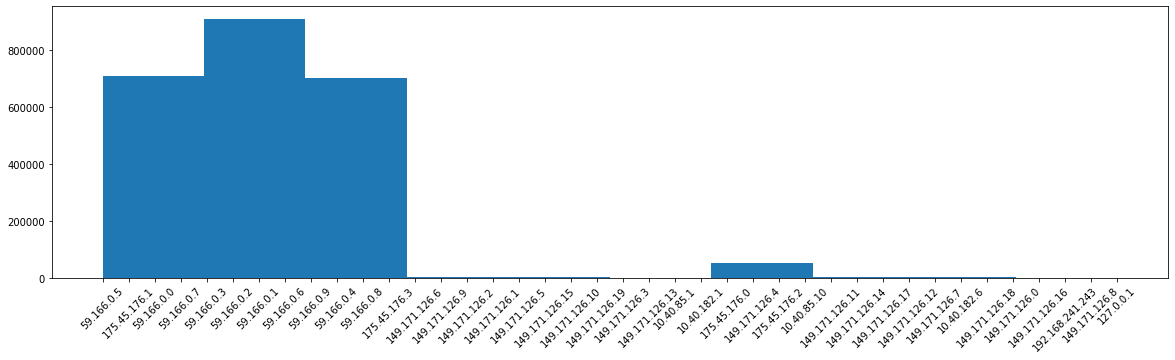

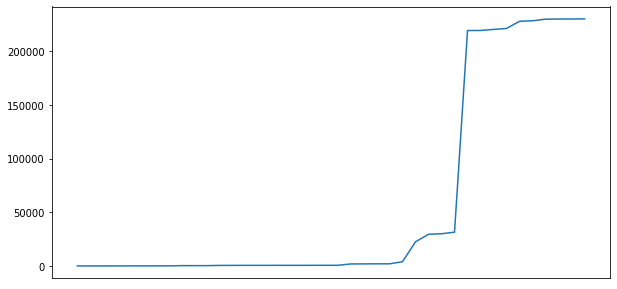

In [9]:
display(data_df['IPV4_SRC_ADDR'].value_counts().describe())

plt.figure(figsize=(20,5))
plt.hist(data_df['IPV4_SRC_ADDR'])
plt.xticks(rotation=45)  # Rotate tick labels by 45 degrees
plt.show()

plt.figure(figsize=(10,5))
plt.plot(data_df['IPV4_SRC_ADDR'].value_counts().sort_values())
# Remove xticks
plt.xticks([])
plt.show()

### Destination addresses

count        40.000000
mean      59756.875000
std       97241.795347
min           1.000000
25%         531.500000
50%        6734.500000
75%       65465.750000
max      230043.000000
Name: IPV4_DST_ADDR, dtype: float64

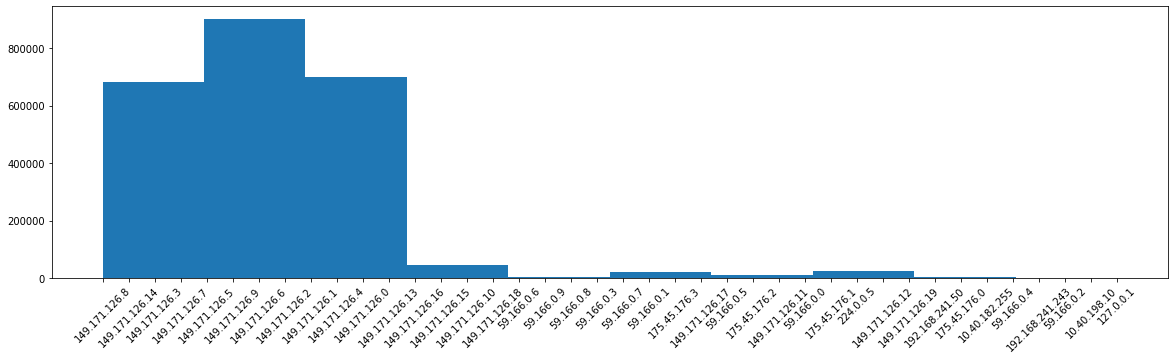

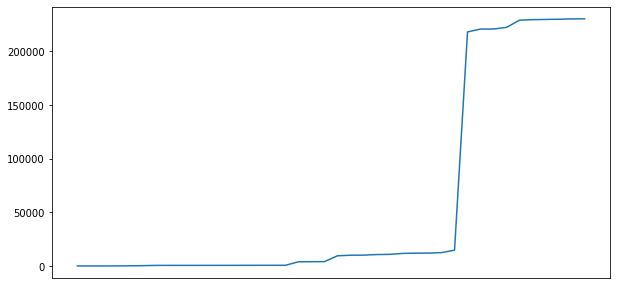

In [10]:
display(data_df['IPV4_DST_ADDR'].value_counts().describe())

plt.figure(figsize=(20,5))
plt.hist(data_df['IPV4_DST_ADDR'])
plt.xticks(rotation=45)  # Rotate tick labels by 45 degrees
plt.show()

plt.figure(figsize=(10,5))
plt.plot(data_df['IPV4_DST_ADDR'].value_counts().sort_values())
# Remove xticks
plt.xticks([])
plt.show()

## 2.2. Protocols
--------------------
The protocol MAPPING is:
6 : TCP
7 : UDP


,PROTOCOL,COUNT
0,6,1830978
1,17,544501
2,1,1556
3,89,1358
4,2,104
...,...,...
250,96,46
251,97,46
252,98,46
253,193,41


<AxesSubplot:ylabel='PROTOCOL'>

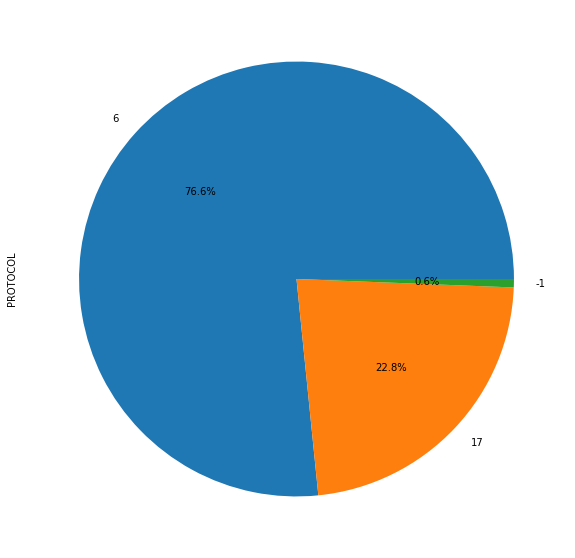

In [11]:
# Count of each protocol (as df)
df_proto = data_df['PROTOCOL'].value_counts().reset_index()
df_proto.columns = ['PROTOCOL', 'COUNT']
display(df_proto)

plt.figure(figsize=(10,10))
df_proto = data_df[['PROTOCOL']].copy()
df_proto.loc[~(df_proto.PROTOCOL.isin([6,17])),'PROTOCOL']=-1
df_proto["PROTOCOL"].value_counts().plot.pie(autopct='%1.1f%%')


## 2.3. Distribution of labels
-------------------------
We can see that there are 96.4% of normal traffic and 3.6% of malicious traffic.

### Binary labels

<AxesSubplot:ylabel='Label'>

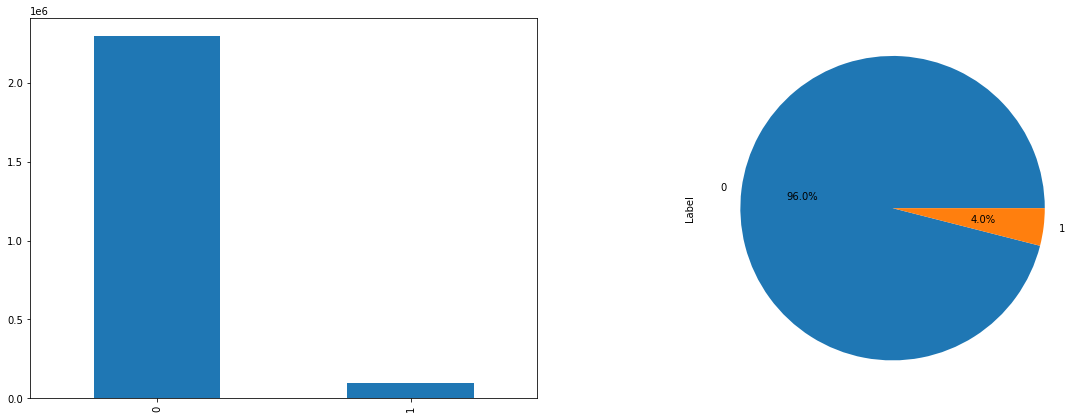

In [12]:
# Left right subplot (left bar right pie)
fig, ax = plt.subplots(1, 2, figsize=(20, 7))
data_df['Label'].value_counts().plot(kind='bar', ax=ax[0])
data_df['Label'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1])

### Multiclass labels
-------------------------
# Types d'attaques

1. **Benign**
   - **Benin** : Cela représente un trafic réseau normal et sans danger, sans aucune activité malveillante.

2. **Fuzzers**
   - **Fuzzers** : Technique d'attaque qui envoie des entrées aléatoires ou malformées à un programme ou à un service pour détecter des failles ou des comportements anormaux.

3. **Generic**
   - **Générique** : Catégorie d'attaques qui ne rentre pas dans une classe spécifique ou qui affecte plusieurs types de systèmes, comme des attaques universelles contre les systèmes de cryptographie.

4. **Reconnaissance**
   - **Reconnaissance** : Activité visant à recueillir des informations sur une cible avant de lancer une attaque plus ciblée. Cela inclut des actions telles que l'analyse de port, la détection de services ou la cartographie du réseau.

5. **Exploits**
   - **Exploits** : Attaques qui tirent parti de vulnérabilités logicielles ou matérielles pour compromettre un système, comme les failles de sécurité ou les faiblesses dans les protocoles.

6. **Analysis**
   - **Analyse** : Catégorie d'attaques qui implique la collecte et l'examen des données du réseau pour obtenir des informations sensibles, par exemple par l'analyse du trafic pour intercepter des mots de passe ou des informations privées.

7. **Backdoor**
   - **Porte dérobée** : Méthode par laquelle un attaquant contourne les mesures de sécurité pour accéder à un système ou un réseau de manière furtive. Les backdoors sont souvent laissées par des logiciels malveillants ou lors de l'installation de logiciels compromis.

8. **DoS**
   - **Déni de service (DoS)** : Attaque visant à rendre un service ou un réseau indisponible en le saturant de requêtes ou en exploitant des failles de saturation des ressources.

9. **Shellcode**
   - **Shellcode** : Séquence de code utilisée pour prendre le contrôle d'un programme ou d'un système lors de l'exploitation d'une vulnérabilité. Elle est souvent utilisée pour obtenir un accès à distance ou ouvrir une session de commande (shell).

10. **Worms**
   - **Vers** : Logiciels malveillants qui se propagent automatiquement à travers les réseaux en exploitant des vulnérabilités. Contrairement aux virus, les vers n'ont pas besoin d'un fichier hôte pour se propager.


<AxesSubplot:ylabel='Attack'>

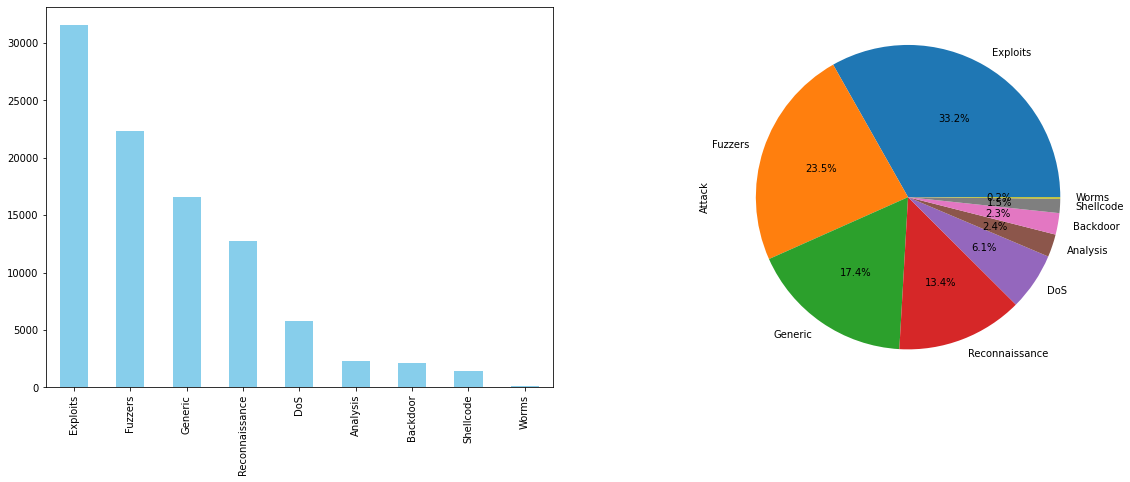

In [13]:
fig, ax  = plt.subplots(1, 2, figsize=(20, 7))

# Subfigure 1 for Bar Plot
data_df.query('Label != 0')['Attack'].value_counts().plot(kind='bar', ax=ax[0], color='skyblue')
data_df.query('Label != 0')['Attack'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1])


## 2.4. Flow duration

count    2.390275e+06
mean     2.591117e+05
std      1.022610e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.294965e+06
Name: FLOW_DURATION_MILLISECONDS, dtype: float64

<Figure size 720x360 with 0 Axes>

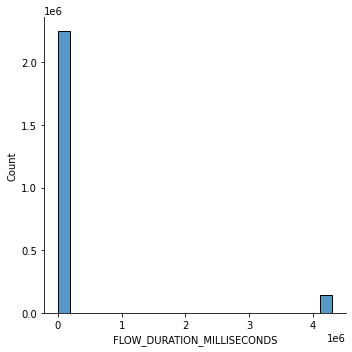

In [14]:
display(data_df['FLOW_DURATION_MILLISECONDS'].describe())

plt.figure(figsize=(10,5))
sns.displot(data_df['FLOW_DURATION_MILLISECONDS'])

144204

<AxesSubplot:xlabel='FLOW_DURATION_MILLISECONDS'>

<Figure size 720x360 with 0 Axes>

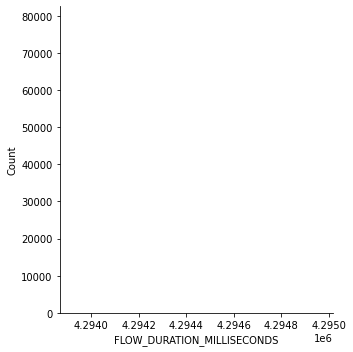

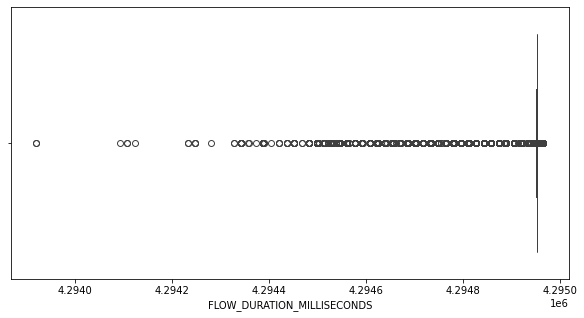

In [15]:
# Count flow duration non zero
display(data_df.query('FLOW_DURATION_MILLISECONDS != 0')['FLOW_DURATION_MILLISECONDS'].count())

# Histogram of flow duration non zero
plt.figure(figsize=(10,5))
sns.displot(data_df.query('FLOW_DURATION_MILLISECONDS != 0')['FLOW_DURATION_MILLISECONDS'])

#Boxplot of flow duration non zero
plt.figure(figsize=(10,5))
sns.boxplot(data=data_df.query('FLOW_DURATION_MILLISECONDS != 0'), x='FLOW_DURATION_MILLISECONDS')

## 2.5. Incomming ws Outgoing traffic

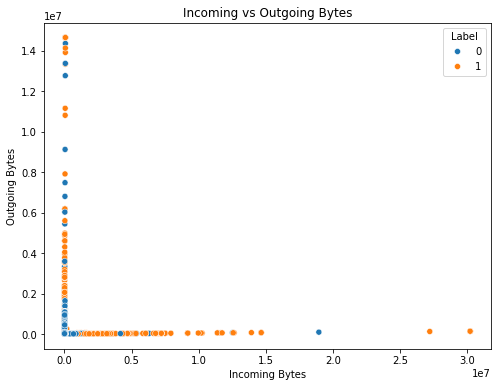

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='IN_BYTES', y='OUT_BYTES', hue='Label', data=data_df)
plt.title('Incoming vs Outgoing Bytes')
plt.xlabel('Incoming Bytes')
plt.ylabel('Outgoing Bytes')
plt.show()

# 2.6 Packet size distribution

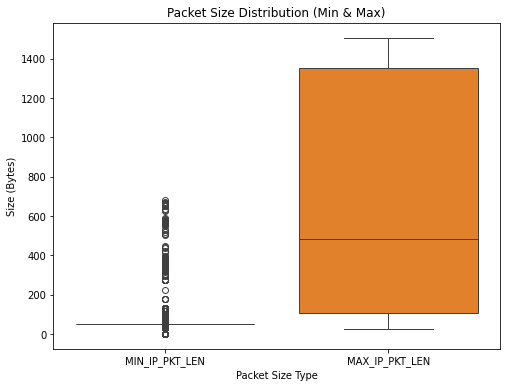

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data_df[['MIN_IP_PKT_LEN', 'MAX_IP_PKT_LEN']])
plt.title('Packet Size Distribution (Min & Max)')
plt.xlabel('Packet Size Type')
plt.ylabel('Size (Bytes)')
plt.show()

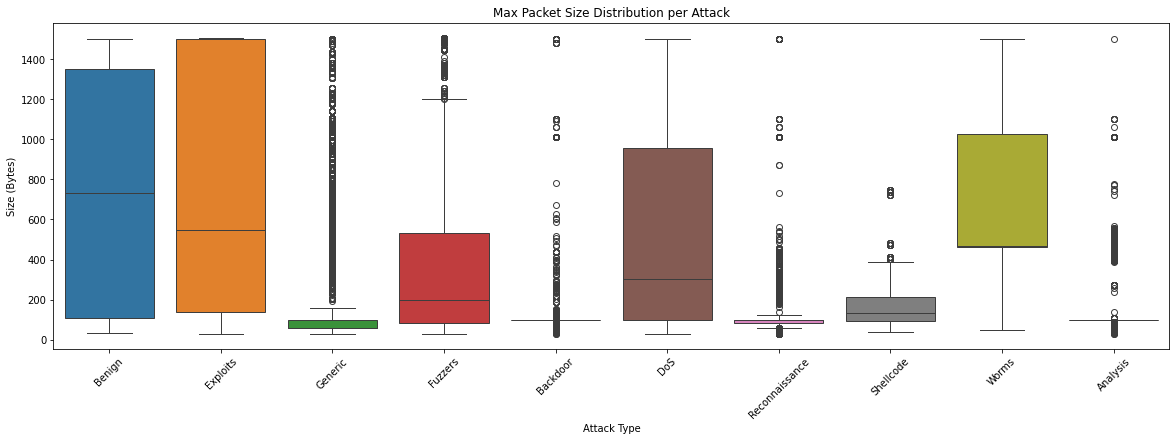

In [18]:
# Distribution of max_ip_pkt_len per Attack
plt.figure(figsize=(20, 6))
sns.boxplot(data=data_df, x='Attack', y='MAX_IP_PKT_LEN', hue='Attack')
plt.title('Max Packet Size Distribution per Attack')
plt.xlabel('Attack Type')
plt.ylabel('Size (Bytes)')
plt.xticks(rotation=45)
plt.show()

## 2.7. Source ports

### 2.7.1 Source ports distribution

Number of distinct standard ports:  90
Number of distinct regular ports:  48127
Number of distinct dynamic ports:  16384


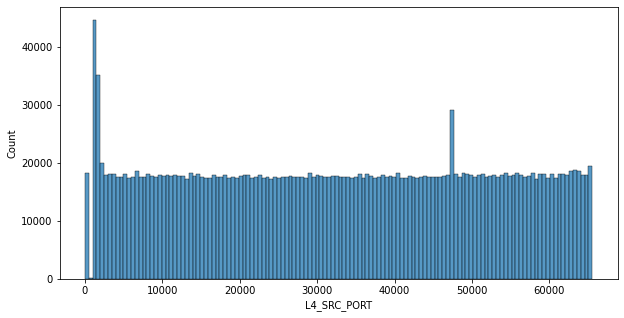

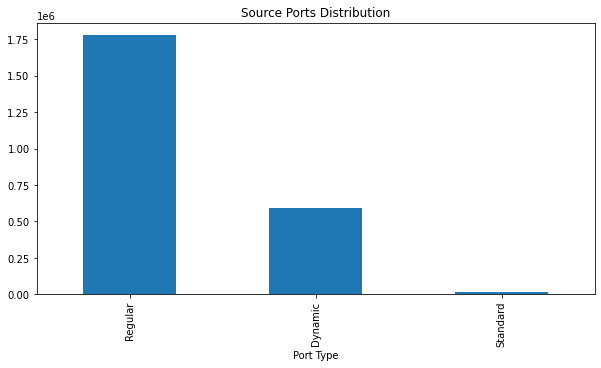

Text(0.5, 0.98, 'Source Ports per Attack')

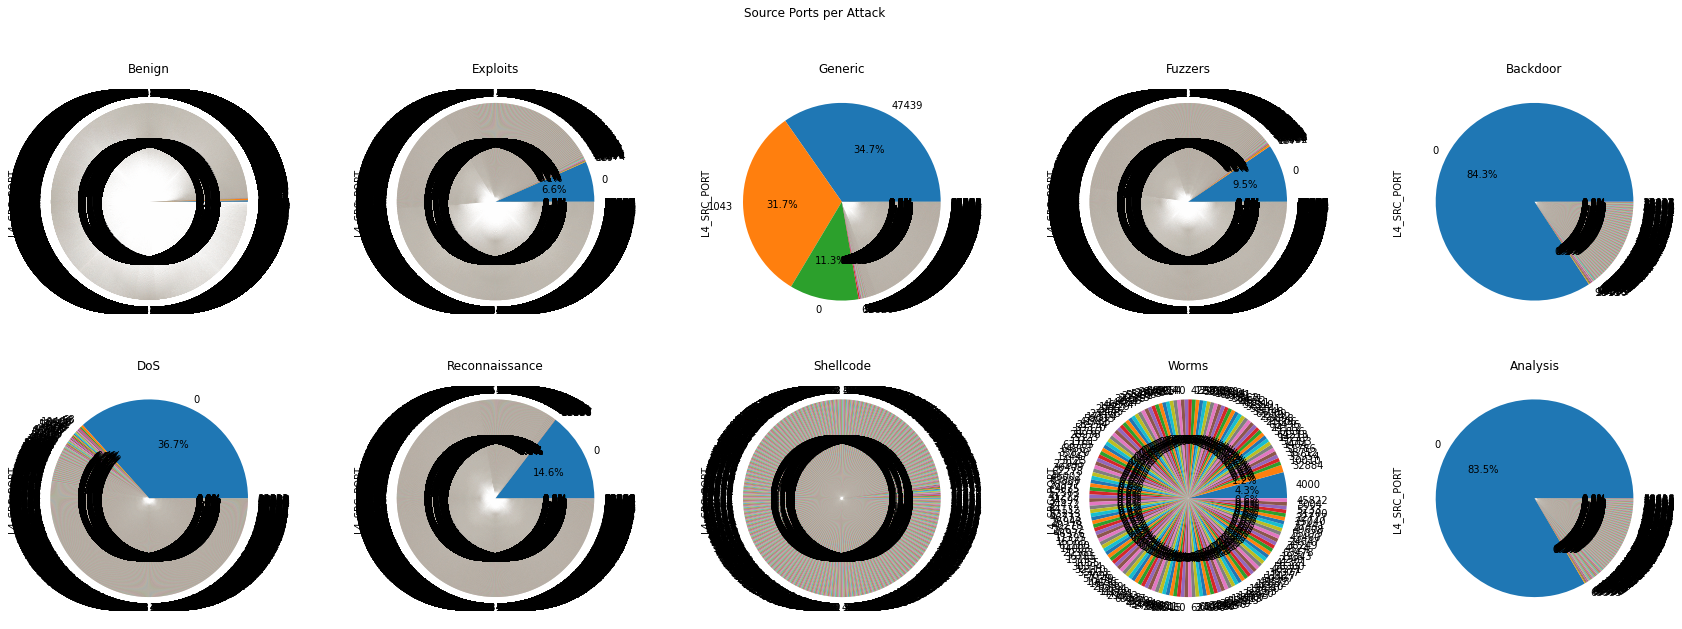

In [19]:
plt.figure(figsize=(10,5))
sns.histplot(data_df['L4_SRC_PORT'])

# Standard ports : 0-1024
print("Number of distinct standard ports: ", data_df.query('L4_SRC_PORT <= 1024')['L4_SRC_PORT'].nunique())
print("Number of distinct regular ports: ", data_df.query('L4_SRC_PORT > 1024 and L4_SRC_PORT <= 49151')['L4_SRC_PORT'].nunique())
print("Number of distinct dynamic ports: ", data_df.query('L4_SRC_PORT > 49151')['L4_SRC_PORT'].nunique())

#Bar plot of the 3 line above(stanard, regular and dynamic ports)
plt.figure(figsize=(10,5))
data_df['L4_SRC_PORT'].apply(lambda x: 'Standard' if x <= 1024 else ('Regular' if x <= 49151 else 'Dynamic')).value_counts().plot(kind='bar')
plt.title('Source Ports Distribution')
plt.xlabel('Port Type')
plt.show()


#Plot as many pie charts as the number of attacks (Top 5 Source Ports per Attack and other in the same pie chart)
fig, ax = plt.subplots(2, 5, figsize=(30, 10))
for i, attack in enumerate(data_df['Attack'].unique()):
    data_df.query('Attack == @attack')['L4_SRC_PORT'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[i//5, i%5])
    ax[i//5, i%5].set_title(attack)
fig.suptitle('Source Ports per Attack')

### 2.7.2 Destination ports distribution

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data_df['L4_DST_PORT'])
plt.show()
# Standard ports : 0-1024
print("Number of distinct standard ports: ", data_df.query('L4_DST_PORT <= 1024')['L4_DST_PORT'].nunique())
print("Number of distinct regular ports: ", data_df.query('L4_DST_PORT > 1024 and L4_DST_PORT <= 49151')['L4_DST_PORT'].nunique())
print("Number of distinct dynamic ports: ", data_df.query('L4_DST_PORT > 49151')['L4_DST_PORT'].nunique())
#Bar plot of the 3 line above(stanard, regular and dynamic ports)

plt.figure(figsize=(10,5))
data_df['L4_DST_PORT'].apply(lambda x: 'Standard' if x <= 1024 else ('Regular' if x <= 49151 else 'Dynamic')).value_counts().plot(kind='bar')
plt.title('Destination Ports Distribution')
plt.xlabel('Port Type')
plt.show()

#Plot as many pie charts as the number of attacks (Top 5 Destination Ports per Attack and other in the same pie chart)
fig, ax = plt.subplots(2, 5, figsize=(30, 10))
for i, attack in enumerate(data_df['Attack'].unique()):
    data_df.query('Attack == @attack')['L4_DST_PORT'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[i//5, i%5])
    ax[i//5, i%5].set_title(attack)
fig.suptitle('Destination Ports per Attack')

## 2.8. Analysis of subnets ipv4

### Three first octets of the source and destination IP addresses

In [ ]:
data_df['IPV4_SRC_ADDR_OCTET1_3']= data_df['IPV4_SRC_ADDR'].apply(lambda x: '.'.join(x.split('.')[:3]))
data_df['IPV4_DST_ADDR_OCTET1_3']= data_df['IPV4_DST_ADDR'].apply(lambda x: '.'.join(x.split('.')[:3]))

#Statistical description of the source IP addresses
print("Number of distinct source networks: ", data_df['IPV4_SRC_ADDR_OCTET1_3'].nunique())
#Statistical description of the destination IP addresses
print("Number of distinct destination networks ", data_df['IPV4_DST_ADDR_OCTET1_3'].nunique())

#The source and destination networks
print("Source networks: ", data_df['IPV4_SRC_ADDR_OCTET1_3'].unique())
print("Destination networks: ", data_df['IPV4_DST_ADDR_OCTET1_3'].unique())

### Host part of the source and destination IP addresses

In [ ]:
data_df['IPV4_SRC_ADDR_OCTET4']= data_df['IPV4_SRC_ADDR'].apply(lambda x: x.split('.')[-1])
data_df['IPV4_DST_ADDR_OCTET4']= data_df['IPV4_DST_ADDR'].apply(lambda x: x.split('.')[-1])

#Statistical description of the source IP addresses
print("Number of distinct source hosts: ", data_df['IPV4_SRC_ADDR_OCTET4'].nunique())
#Statistical description of the destination IP addresses
print("Number of distinct destination hosts ", data_df['IPV4_DST_ADDR_OCTET4'].nunique())

# The source and destination hosts
print("Source hosts: ", data_df['IPV4_SRC_ADDR_OCTET4'].unique())
print("Destination hosts: ", data_df['IPV4_DST_ADDR_OCTET4'].unique())

## Analysis of  ipv4 network, host

### (Network Part) Three first octets of the source and destination IP addresses

In [ ]:
data_df['IPV4_SRC_ADDR_OCTET1_3']= data_df['IPV4_SRC_ADDR'].apply(lambda x: '.'.join(x.split('.')[:3]))
data_df['IPV4_DST_ADDR_OCTET1_3']= data_df['IPV4_DST_ADDR'].apply(lambda x: '.'.join(x.split('.')[:3]))

#Statistical description of the source IP addresses
print("Number of distinct source networks: ", data_df['IPV4_SRC_ADDR_OCTET1_3'].nunique())
#Statistical description of the destination IP addresses
print("Number of distinct destination networks ", data_df['IPV4_DST_ADDR_OCTET1_3'].nunique())

#The source and destination networks
print("Source networks: ", data_df['IPV4_SRC_ADDR_OCTET1_3'].unique())
print("Destination networks: ", data_df['IPV4_DST_ADDR_OCTET1_3'].unique())

### Host part of the source and destination IP addresses

In [ ]:
data_df['IPV4_SRC_ADDR_OCTET4']= data_df['IPV4_SRC_ADDR'].apply(lambda x: x.split('.')[-1])
data_df['IPV4_DST_ADDR_OCTET4']= data_df['IPV4_DST_ADDR'].apply(lambda x: x.split('.')[-1])

#Statistical description of the source IP addresses
print("Number of distinct source hosts: ", data_df['IPV4_SRC_ADDR_OCTET4'].nunique())
#Statistical description of the destination IP addresses
print("Number of distinct destination hosts ", data_df['IPV4_DST_ADDR_OCTET4'].nunique())

# The source and destination hosts
print("Source hosts: ", data_df['IPV4_SRC_ADDR_OCTET4'].unique())
print("Destination hosts: ", data_df['IPV4_DST_ADDR_OCTET4'].unique())

# 3. Correlation Analysis

## 3.1 Correlation matrix

In [ ]:
from network_ad.config import BASE_CATEGORICAL_FEATURES
data_df_num = data_df.drop(BASE_CATEGORICAL_FEATURES, axis=1, errors='ignore')
plt.figure(figsize=(20, 20))
sns.heatmap(data_df_num.corr(), annot=True, fmt='.2f', cmap='coolwarm')

## 3.2. Top 20 features with the highest correlation with the label (in absolute value)

In [ ]:
corr_label = data_df_num.corr()['Label'].abs().sort_values(ascending=False)
#In a colored bar plot
plt.figure(figsize=(20, 6))
corr_label[1:21].plot(kind='bar', color='skyblue')
plt.title('Top 20 Features with the Highest Correlation with the Label')
plt.ylabel('Correlation')
